# Comparing different regression algorithms to calculate MAPE

## EDA

In [120]:
#importing different libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
# reading dataset
df = pd.read_csv('update house data.csv')
df

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,NaN,1,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90,3.86,71.98
1,Apartment,733,2.0,2,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96,3.55,71.20
2,Apartment,737,4.0,2,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121,3.81,71.39
3,Apartment,900,3.0,2,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100,1.34,31.46
4,Bungalow,2238,14.0,6,0.0,No,All time,5.46,Well below average,Medium,116,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,Single-family home,1120,3.0,2,0.0,No,All time,5.55,Slightly above average,Medium,80,3.56,73.43
39495,Apartment,445,1.0,3,1.0,No,All time,5.70,Slightly above average,Medium,86,2.93,79.91
39496,Bungalow,3780,6.0,6,0.0,Yes,Once in two days,6.84,Well below average,Medium,137,3.80,81.44
39497,Single-family home,1266,3.0,1,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88,3.25,71.33


In [123]:
#checking 1st 5 rows of the dataset
df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,Apartment,106,NaN,1,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90,3.86,71.98
1,Apartment,733,2.0,2,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96,3.55,71.20
2,Apartment,737,4.0,2,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121,3.81,71.39
3,Apartment,900,3.0,2,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100,1.34,31.46
4,Bungalow,2238,14.0,6,0.0,No,All time,5.46,Well below average,Medium,116,4.77,93.70


In [124]:
#checking last 5 rows of dataset
df.tail()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
39494,Single-family home,1120,3.0,2,0.0,No,All time,5.55,Slightly above average,Medium,80,3.56,73.43
39495,Apartment,445,1.0,3,1.0,No,All time,5.70,Slightly above average,Medium,86,2.93,79.91
39496,Bungalow,3780,6.0,6,0.0,Yes,Once in two days,6.84,Well below average,Medium,137,3.80,81.44
39497,Single-family home,1266,3.0,1,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88,3.25,71.33
39498,Single-family home,1229,2.0,4,0.0,No,All time,8.29,Well below average,High,132,4.67,83.25


In [125]:
#checking shape of dataset
df.shape

(39499, 13)

there are total of 39499 rows and 13 columns in dataset

In [126]:
#checking information of dataset
#tells us about how many rows are present which value and how many are null
# also tells about the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Type           39499 non-null  object 
 1   Property_Area           39499 non-null  int64  
 2   Number_of_Windows       37845 non-null  float64
 3   Number_of_Doors         39499 non-null  int64  
 4   Frequency_of_Powercuts  38116 non-null  float64
 5   Power_Backup            39499 non-null  object 
 6   Water_Supply            39499 non-null  object 
 7   Traffic_Density_Score   39499 non-null  float64
 8   Crime_Rate              38712 non-null  object 
 9   Dust_and_Noise          38280 non-null  object 
 10  Air_Quality_Index       39499 non-null  int64  
 11  Neighborhood_Review     39499 non-null  float64
 12  Habitability_score      39499 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 3.9+ MB


In [127]:
#describing the data 
# can check total rows,standard deviation,quartiles,min and max 
df.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,37845.000000,39499.000000,38116.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,1391.715638,3.923768,2.331375,0.484678,6.354772,121.352566,3.735945,73.482297
std,1953.287544,2.690992,1.179964,0.752207,1.219681,62.384669,0.796843,14.118753
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,494.000000,2.000000,1.000000,0.000000,5.600000,95.000000,3.220000,69.660000
50%,932.000000,4.000000,2.000000,0.000000,6.470000,113.000000,3.850000,75.760000
75%,1770.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.260000,82.260000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000,100.000000


In [128]:
#all the columns present in data
df.columns

Index(['Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Frequency_of_Powercuts', 'Power_Backup',
       'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate', 'Dust_and_Noise',
       'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score'],
      dtype='object')

In [129]:
#data types of the dataset
df.dtypes

Property_Type              object
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index           int64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

In [130]:
df['Property_Type'].unique()

array(['Apartment', 'Bungalow', 'Single-family home', 'Duplex',
       '#R%$G&867', 'Container Home'], dtype=object)

In [131]:
#checking null values
df.isna().sum()

Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

There are total Number_of_Windows:1654 ,Frequency_of_Powercuts:1383,Crime_Rate:787,Dust_and_Noise:1219 null values

### Handling null values 

### changing null values of categorical with the mode of that feature

In [132]:
df['Crime_Rate'].fillna(df['Crime_Rate'].mode()[0],inplace=True)

In [133]:
df['Dust_and_Noise'].fillna(df['Dust_and_Noise'].mode()[0],inplace=True)

### changing null values of numerical with the mean of that feature

In [134]:
df['Number_of_Windows'].fillna(df['Number_of_Windows'].mean(),inplace=True)

In [135]:
df['Frequency_of_Powercuts'].fillna(df['Frequency_of_Powercuts'].mean(),inplace=True)

In [136]:
#rechecking null values
df.isna().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [137]:
#checking counts of the values
df.value_counts()

Property_Type       Property_Area  Number_of_Windows  Number_of_Doors  Frequency_of_Powercuts  Power_Backup  Water_Supply             Traffic_Density_Score  Crime_Rate              Dust_and_Noise  Air_Quality_Index  Neighborhood_Review  Habitability_score
#R%$G&867           113            2.0                3                3.0                     No            All time                 6.74                   Well below average      Medium          170                2.81                 77.12                 1
Duplex              1054           6.0                2                3.0                     No            All time                 7.43                   Well below average      Medium          107                2.89                 77.11                 1
                    1053           6.0                2                0.0                     No            All time                 5.60                   Well below average      Medium          100                3.54  

In [138]:
#checking mean
df.mean()

Property_Area             1391.715638
Number_of_Windows            3.923768
Number_of_Doors              2.331375
Frequency_of_Powercuts       0.484678
Traffic_Density_Score        6.354772
Air_Quality_Index          121.352566
Neighborhood_Review          3.735945
Habitability_score          73.482297
dtype: float64

In [139]:
#checking median
df.median()

Property_Area             932.000000
Number_of_Windows           3.923768
Number_of_Doors             2.000000
Frequency_of_Powercuts      0.000000
Traffic_Density_Score       6.470000
Air_Quality_Index         113.000000
Neighborhood_Review         3.850000
Habitability_score         75.760000
dtype: float64

In [140]:
#removing outliers with IQR 
q1 = np.quantile(df.Habitability_score, 0.25) #1st quantile
q2 = np.quantile(df.Habitability_score, 0.5) #2nd quantile
q3 = np.quantile(df.Habitability_score, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [141]:
#setting the fences on our dataset to identify the outliers
lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [142]:
#removal of lower and upper outliers in our data
df = df[~((df.Habitability_score > upper) | (df.Habitability_score < lower))]


In [144]:
#rechecking the shape
df.shape

(36187, 13)

In [145]:
#rechecking mean
df.mean()

Property_Area             1419.454804
Number_of_Windows            3.977667
Number_of_Doors              2.347804
Frequency_of_Powercuts       0.439526
Traffic_Density_Score        6.331176
Air_Quality_Index          120.612375
Neighborhood_Review          3.846331
Habitability_score          76.924987
dtype: float64

In [146]:
#rechecking median
df.median()

Property_Area             954.000000
Number_of_Windows           3.923768
Number_of_Doors             2.000000
Frequency_of_Powercuts      0.000000
Traffic_Density_Score       6.450000
Air_Quality_Index         112.000000
Neighborhood_Review         4.060000
Habitability_score         76.720000
dtype: float64

after removal of outliers mean and median are almost equal

In [147]:
#checking correlation between variables
df.corr()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_Area,1.000000,0.266161,0.219127,0.002545,0.001731,0.002585,-0.004683,0.046468
Number_of_Windows,0.266161,1.000000,0.391195,0.009876,0.001758,0.007680,-0.025581,0.066909
Number_of_Doors,0.219127,0.391195,1.000000,0.006131,-0.000424,0.003522,-0.024318,0.062712
Frequency_of_Powercuts,0.002545,0.009876,0.006131,1.000000,-0.006443,-0.016516,-0.567451,-0.119289
Traffic_Density_Score,0.001731,0.001758,-0.000424,-0.006443,1.000000,0.299109,0.023360,-0.023380
Air_Quality_Index,0.002585,0.007680,0.003522,-0.016516,0.299109,1.000000,-0.003151,-0.015758
Neighborhood_Review,-0.004683,-0.025581,-0.024318,-0.567451,0.023360,-0.003151,1.000000,0.321392
Habitability_score,0.046468,0.066909,0.062712,-0.119289,-0.023380,-0.015758,0.321392,1.000000


correlation between feature and label is not too much

In [28]:
#defining the features and label column of our data
X = df.drop('Habitability_score',axis = 'columns')
y = df[['Habitability_score']]

In [29]:
#dividing data into categorical and numerical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(exclude = np.number)


In [30]:
#describing numerical features
X_num.describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,36187.000000,36187.000000,36187.000000,36187.000000,36187.000000,36187.000000,36187.000000
mean,1419.454804,3.977667,2.347804,0.439526,6.331176,120.612375,3.846331
std,1960.834997,2.674098,1.190923,0.694915,1.215652,61.950923,0.711213
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.670000
25%,511.000000,2.000000,1.000000,0.000000,5.590000,95.000000,3.470000
50%,954.000000,3.923768,2.000000,0.000000,6.450000,112.000000,4.060000
75%,1807.000000,5.000000,3.000000,1.000000,7.200000,139.000000,4.400000
max,28057.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000


In [31]:
#describing categorical features
X_cat.describe()

,Property_Type,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
count,36187,36187,36187,36187,36187
unique,6,3,5,4,3
top,Apartment,No,All time,Well below average,Medium
freq,13012,26552,18509,19905,31589


### visualize data

In [32]:
import matplotlib.pyplot as plt

### univariate analysis: Numerical data - histogram and boxplot

<AxesSubplot:>

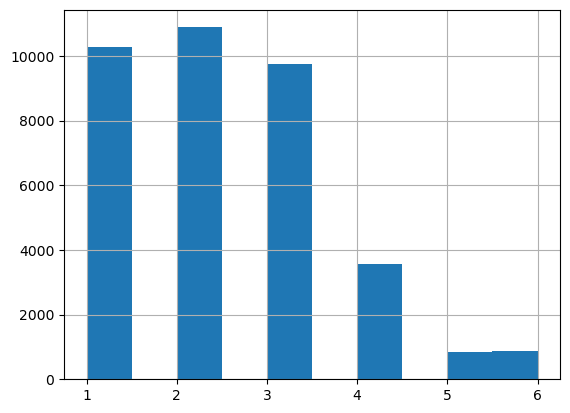

In [33]:
df['Number_of_Doors'].hist()

most people have max 3 doors

<AxesSubplot:>

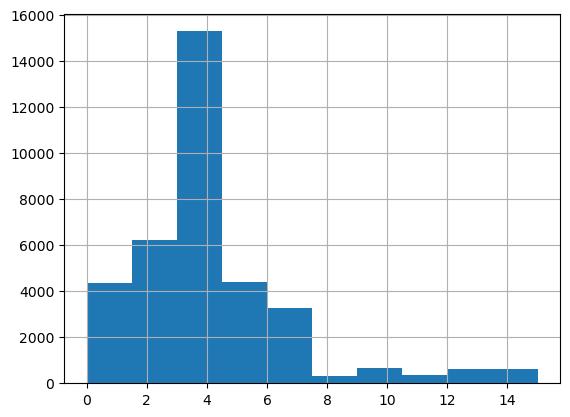

In [34]:
df['Number_of_Windows'].hist()

most of the people have 4 windows in there house

<AxesSubplot:>

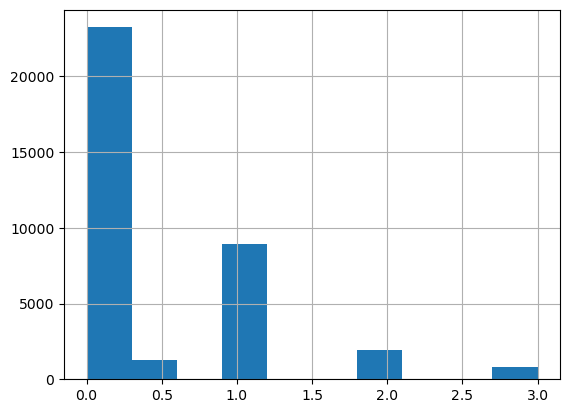

In [35]:
df['Frequency_of_Powercuts'].hist()

most houses doesnt have powercut issues

<AxesSubplot:>

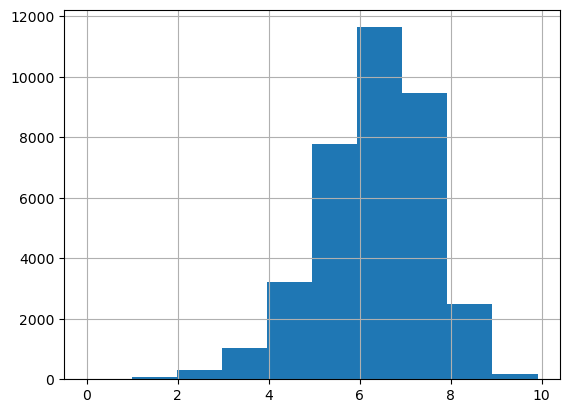

In [36]:
df['Traffic_Density_Score'].hist()

traffic density is normally distributed across areas

<AxesSubplot:>

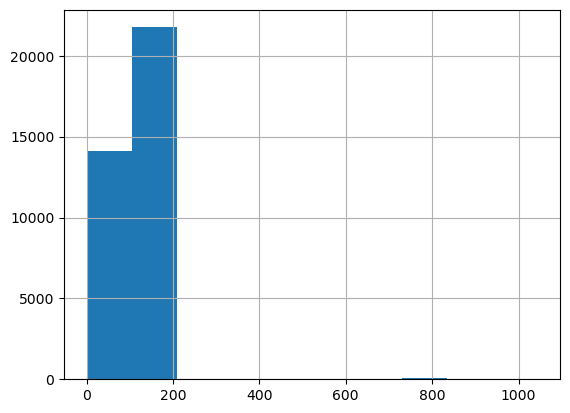

In [37]:
df['Air_Quality_Index'].hist()

air quality shows that air quality is good for most of the regions

<AxesSubplot:>

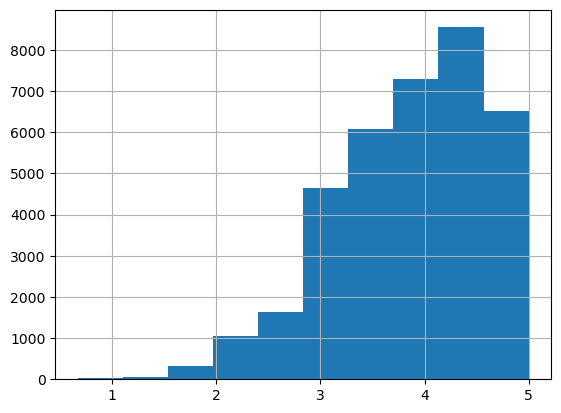

In [38]:
df['Neighborhood_Review'].hist()

neighborhood review is average for most of the regions

In [39]:
#categorical variable: barplot

In [40]:
#describing categorical features
X_cat.describe()

,Property_Type,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
count,36187,36187,36187,36187,36187
unique,6,3,5,4,3
top,Apartment,No,All time,Well below average,Medium
freq,13012,26552,18509,19905,31589


<AxesSubplot:>

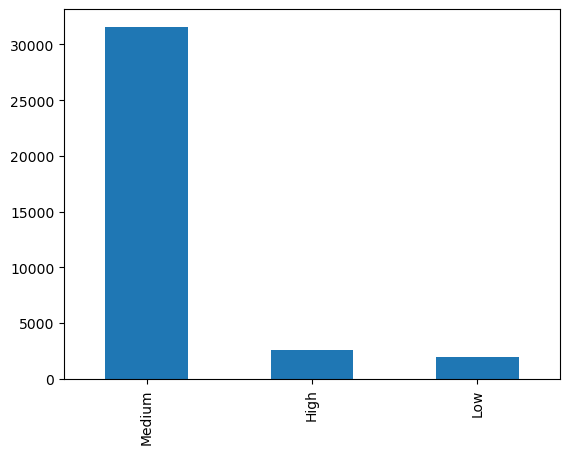

In [41]:

df['Dust_and_Noise'].value_counts().plot(kind='bar')

most of the houses are in medium range of dust and noise

<AxesSubplot:>

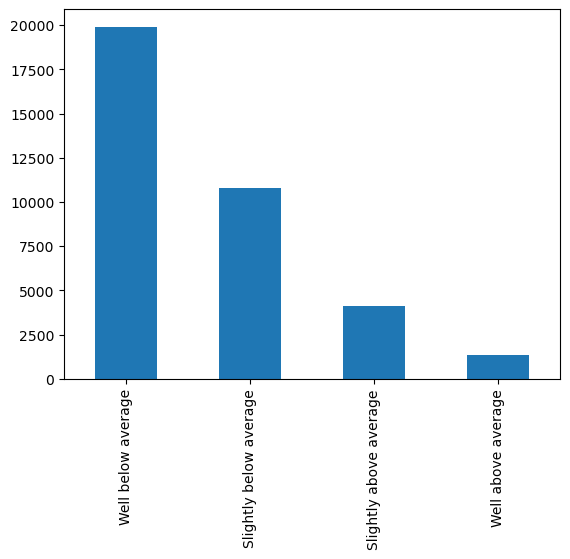

In [42]:

df['Crime_Rate'].value_counts().plot(kind='bar')

crime rate is low in max location

<AxesSubplot:>

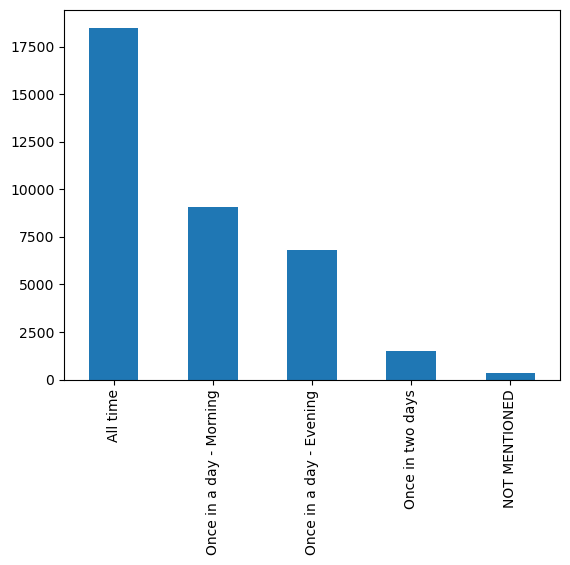

In [43]:

df['Water_Supply'].value_counts().plot(kind='bar')

water supply is available almost all the time for most houses

<AxesSubplot:>

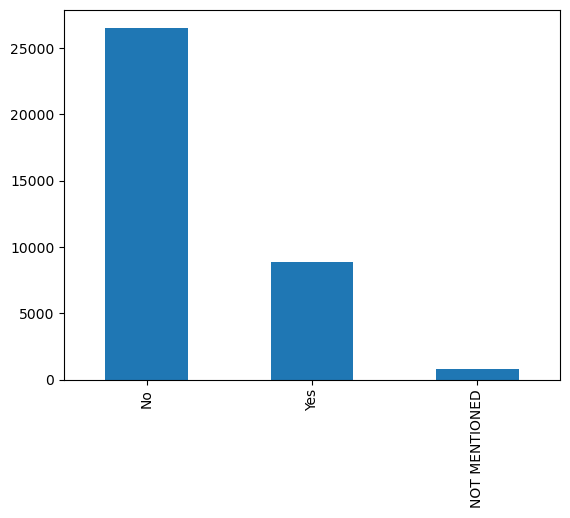

In [44]:

df['Power_Backup'].value_counts().plot(kind='bar')

very less amount of houses has power backup

<AxesSubplot:>

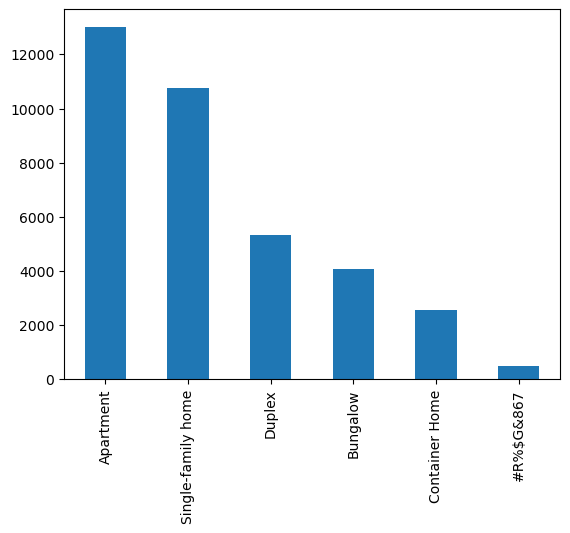

In [45]:

df['Property_Type'].value_counts().plot(kind='bar')

most people live in apartments followed by single family home

In [46]:
#bivariate analysis

In [47]:
#checking correlation between variables
df.corr()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_Area,1.000000,0.266161,0.219127,0.002545,0.001731,0.002585,-0.004683,0.046468
Number_of_Windows,0.266161,1.000000,0.391195,0.009876,0.001758,0.007680,-0.025581,0.066909
Number_of_Doors,0.219127,0.391195,1.000000,0.006131,-0.000424,0.003522,-0.024318,0.062712
Frequency_of_Powercuts,0.002545,0.009876,0.006131,1.000000,-0.006443,-0.016516,-0.567451,-0.119289
Traffic_Density_Score,0.001731,0.001758,-0.000424,-0.006443,1.000000,0.299109,0.023360,-0.023380
Air_Quality_Index,0.002585,0.007680,0.003522,-0.016516,0.299109,1.000000,-0.003151,-0.015758
Neighborhood_Review,-0.004683,-0.025581,-0.024318,-0.567451,0.023360,-0.003151,1.000000,0.321392
Habitability_score,0.046468,0.066909,0.062712,-0.119289,-0.023380,-0.015758,0.321392,1.000000


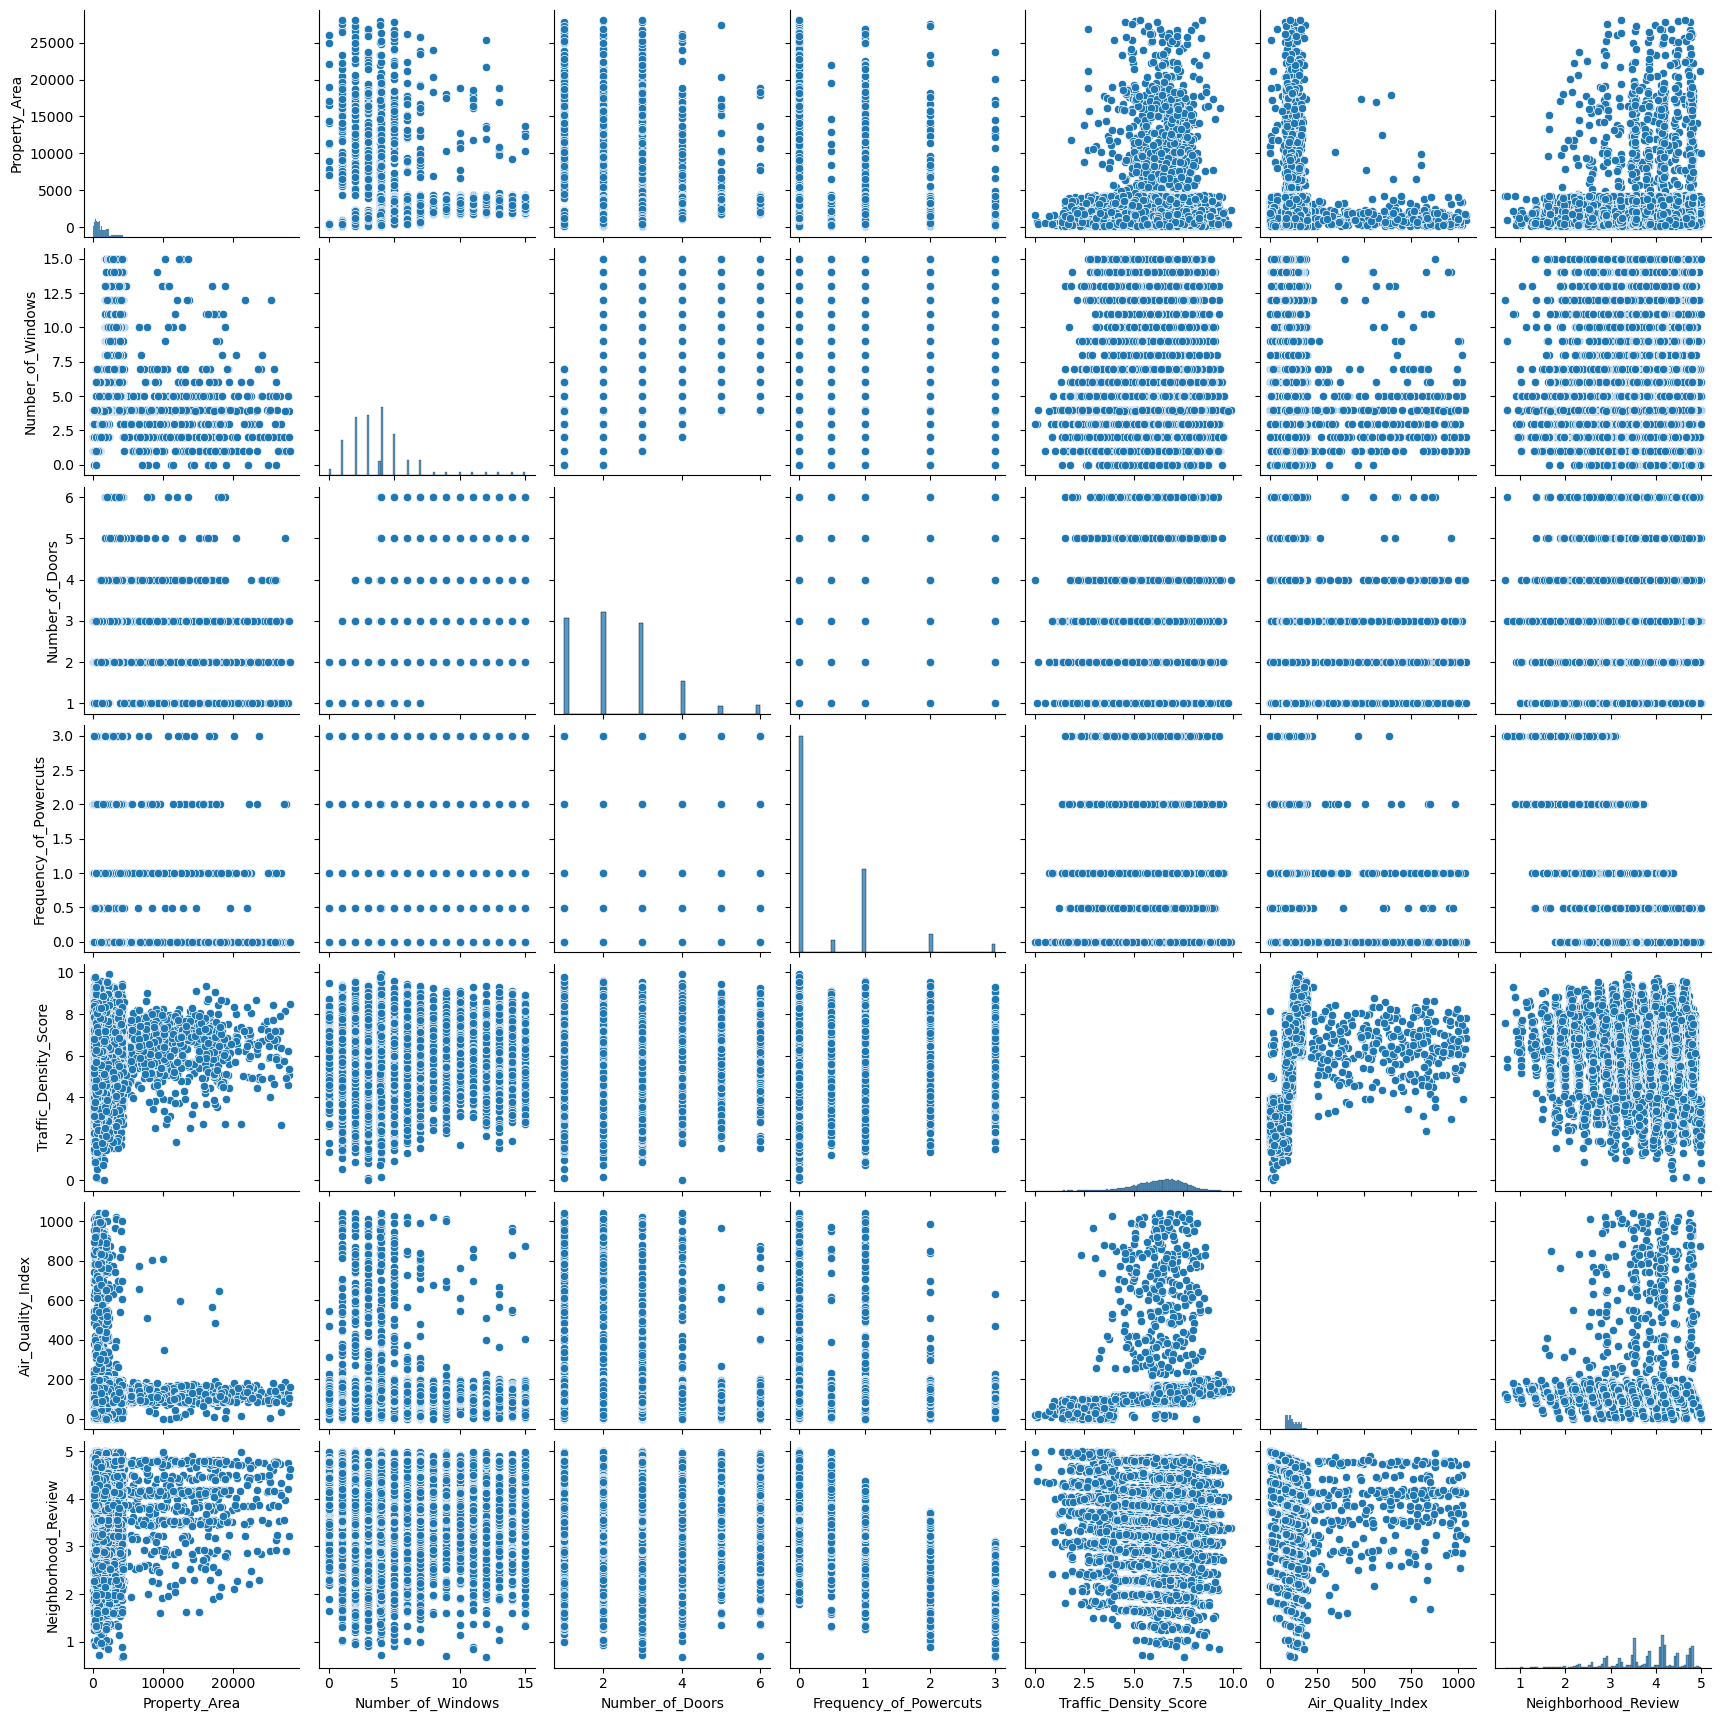

In [48]:
# pairplots to study relationships
sns.pairplot(X_num);

there is not very much correlation between features and target

# KNN regression

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
sc = MinMaxScaler()

In [51]:
#scaling the data using min max scaler
X_num_scaled = sc.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled.columns = X_num.columns

In [52]:
#checking scaled head
X_num_scaled.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,0.000215,0.261585,0.0,0.000000,0.594349,0.086207,0.736721
1,0.022642,0.133333,0.2,0.333333,0.440969,0.091954,0.665127
2,0.022785,0.266667,0.2,0.000000,0.751766,0.115900,0.725173
3,0.076475,0.933333,1.0,0.000000,0.550959,0.111111,0.946882
4,0.038810,0.200000,0.4,0.000000,0.574168,0.087165,0.882217


In [53]:
#checking shape of scaled numeric data 
X_num_scaled.shape

(36187, 7)

In [54]:
#One- Hot Encoding the categorical features
X_cat_encoded = pd.get_dummies(X_cat, columns = ['Property_Type','Power_Backup','Water_Supply','Crime_Rate','Dust_and_Noise'])

In [55]:
#setting the index of both scaled categorical and numerical data
X_num_scaled.reset_index(inplace = True)
X_cat_encoded.reset_index(inplace = True)


In [56]:
#combining both the scaled data to make the final features data
X = pd.concat([X_num_scaled, X_cat_encoded],axis = 'columns')

In [57]:
#cheching shape of features
X.shape

(36187, 30)

In [58]:
#spliiting our feature and label data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state = 2)

In [59]:
#checking shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25330, 30), (10857, 30), (25330, 1), (10857, 1))

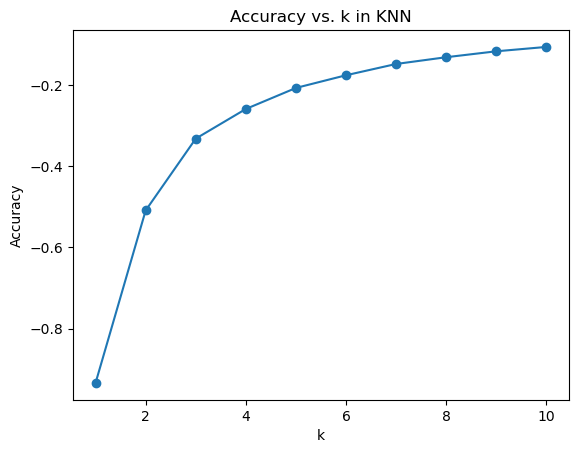

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


# Define a range of k values to evaluate
k_values = range(1, 11)

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over different values of k
for k in k_values:
    # Create and fit the KNN regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Evaluate the accuracy on the test set
    accuracy = knn.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Plotting the accuracy scores against k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.show()



In [62]:
#import library for knn regression 
from sklearn.neighbors import KNeighborsRegressor

#instantiating knn
#nearest neighbors selected are 11
knn = KNeighborsRegressor(n_neighbors=11)

In [63]:
#fitting the model with knn algorithm
model_knn = knn.fit(X_train,y_train)

In [64]:
#importing Mean Absolute Percentage as a model performance metric
from sklearn.metrics import mean_absolute_percentage_error as mape

#predicting for training data
preds_train = model_knn.predict(X_train)

#calculating mape for our training data
train_MAPE = mape(y_train, preds_train) 

#printing train MAPE
print(train_MAPE)

0.08555636984946839


In [65]:
#predicting for our test data
preds_test = model_knn.predict(X_test) 

#calculating mape for our test data
test_MAPE = mape(y_test, preds_test) 

#printing test MAPE
print(test_MAPE) 

0.0957805705557048


## Linear regression

In [66]:
 #instantiating a linear regression model
lr = LinearRegression()

#fitting a linear regression model for our X and y
model_lr = lr.fit(X_train,y_train) 

In [67]:
 #predicting for our train data using lr model
preds_train_lr = model_lr.predict(X_train)

 #calculating mape for our train data
train_MAPE_lr = mape(y_train, preds_train_lr)

#printing train MAPE
print(train_MAPE_lr)

0.08048898145126349


In [68]:
#predicting for our test data using lr model
preds_test_lr = model_lr.predict(X_test) 

#calculating mape for our test data 
test_MAPE_lr = mape(y_test, preds_test_lr) 

#printing test MAPE
print(test_MAPE_lr)

0.08137733887793054


## Desicion Tree

In [69]:
#importing libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [70]:
#instantiating decision tree regressor
#criterion is absolute error
#hyperparameters are max depth
dtr = DecisionTreeRegressor(criterion = 'absolute_error',max_depth =10, random_state = 5)


In [71]:
#fitting the model
model_dtr = dtr.fit(X_train,y_train)

In [72]:
#predicting our train data using decision tree regressor model
preds_train_dtr = model_dtr.predict(X_train) 

 #calculating mape for our train data
train_MAPE_dtr = mape(y_train, preds_train_dtr)

#printing train mape
print(train_MAPE_dtr) 

0.07114924072420849


In [73]:
#predicting our test data using decision tree regressor model
preds_test_dtr = model_dtr.predict(X_test) 

#calculating mape for our test data
test_MAPE_dtr = mape(y_test, preds_test_dtr) 

#printing test mape
print(test_MAPE_dtr) 

0.08303413274149792


## Linear regression using lasso

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Lasso Regularization
lambda_values = np.linspace(0, 5, num=50)
lasso_train_mape = []
lasso_test_mape = []
for lam in lambda_values:
    lasso_model = Lasso(alpha=lam)
    lasso_model.fit(X_train, y_train)
    lasso_train_mape.append(mean_absolute_percentage_error(y_train, lasso_model.predict(X_train)))
    lasso_test_mape.append(mean_absolute_percentage_error(y_test, lasso_model.predict(X_test)))

In [75]:
train_lasso_mape=np.mean(lasso_train_mape)
train_lasso_mape

0.08910416816942904

In [76]:
test_lasso_mape=np.mean(lasso_test_mape)
test_lasso_mape

0.09053947972377585

## multiple linear regression using ridge

In [77]:
#  Ridge Regularization
ridge_train_mape = []
ridge_test_mape = []
for lam in lambda_values:
    ridge_model = Ridge(alpha=lam)
    ridge_model.fit(X_train, y_train)
    ridge_train_mape.append(mean_absolute_percentage_error(y_train, ridge_model.predict(X_train)))
    ridge_test_mape.append(mean_absolute_percentage_error(y_test, ridge_model.predict(X_test)))

In [78]:
train_ridge_mape = np.mean(ridge_train_mape)
train_ridge_mape

0.08048872781436309

In [79]:
test_ridge_mape=np.mean(ridge_test_mape)
test_ridge_mape

0.08138017472002385

In [80]:
#creating new dataframe to add mape of all algorithm together
df_snapshot = pd.DataFrame(columns=['model','train_MAPE','test_MAPE'])
df_snapshot

,model,train_MAPE,test_MAPE


In [81]:
#performance metric of knn
model_knn_performance = {'model':"model_knn",'train_MAPE':train_MAPE,'test_MAPE':test_MAPE}

In [82]:
#performance metric of linear regression
model_lr_performance = {'model':"model_lr",'train_MAPE':train_MAPE_lr,'test_MAPE':test_MAPE_lr}

In [83]:
#performance metric of decision tree
model_dtr_performance = {'model':"model_dtr",'train_MAPE':train_MAPE_dtr,'test_MAPE':test_MAPE_dtr}

In [84]:
#performance metric of decision tree
model_lasso_performance = {'model':"model_lasso",'train_MAPE':train_lasso_mape,'test_MAPE':test_lasso_mape}

In [85]:
#performance metric of decision tree
model_ridge_performance = {'model':"model_ridge",'train_MAPE':train_ridge_mape,'test_MAPE':test_ridge_mape}

In [86]:
#appending performance of knn to dataframe
df_snapshot = df_snapshot.append(model_knn_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_knn,0.085556,0.095781


In [87]:
#appending performance of linear regression to dataframe
df_snapshot = df_snapshot.append(model_lr_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_knn,0.085556,0.095781
1,model_lr,0.080489,0.081377


In [88]:
#appending performance of decision tree to dataframe
df_snapshot = df_snapshot.append(model_dtr_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_knn,0.085556,0.095781
1,model_lr,0.080489,0.081377
2,model_dtr,0.071149,0.083034


In [89]:
#appending performance of lasso to dataframe
df_snapshot = df_snapshot.append(model_lasso_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_knn,0.085556,0.095781
1,model_lr,0.080489,0.081377
2,model_dtr,0.071149,0.083034
3,model_lasso,0.089104,0.090539


In [90]:
#appending performance of ridge to dataframe
df_snapshot = df_snapshot.append(model_ridge_performance, ignore_index=True)
df_snapshot

,model,train_MAPE,test_MAPE
0,model_knn,0.085556,0.095781
1,model_lr,0.080489,0.081377
2,model_dtr,0.071149,0.083034
3,model_lasso,0.089104,0.090539
4,model_ridge,0.080489,0.081380


Linear Regression is giving the best performance the gap between train and test is low and error percentage is also very low